In [1]:
import openai
import os
from dotenv import load_dotenv
_ = load_dotenv()
import requests
from PIL import Image
from io import BytesIO
import base64



client = openai.OpenAI(api_key="OPENAI_API_KEY2")

In [8]:
def generate_image_dalle(prompt, size="1024x1024", quality="standard", model="dall-e-3", n=1):
    """
    Generate an image using DALL-E via OpenAI API
    
    Parameters:
    - prompt (str): Description of the image to generate
    - size (str): Size of the image. Options: "1024x1024", "1792x1024", or "1024x1792"
    - quality (str): Quality of the image. Options: "standard" or "hd"
    - model (str): DALL-E model to use. Options: "dall-e-2" or "dall-e-3"
    - n (int): Number of images to generate (only applicable for dall-e-2)
    
    Returns:
    - Dictionary containing image data and other information
    """
    try:
        response = openai.images.generate(
            model=model,
            prompt=prompt,
            size=size,
            quality=quality,
            n=n
        )
        
        return response
    except Exception as e:
        print(f"Error generating image: {e}")
        return None

In [9]:
if __name__ == "__main__":
    # Example prompt
    prompt = "A serene landscape with mountains and a lake at sunset, photorealistic style"
    
    # Generate image
    response = generate_image_dalle(prompt)

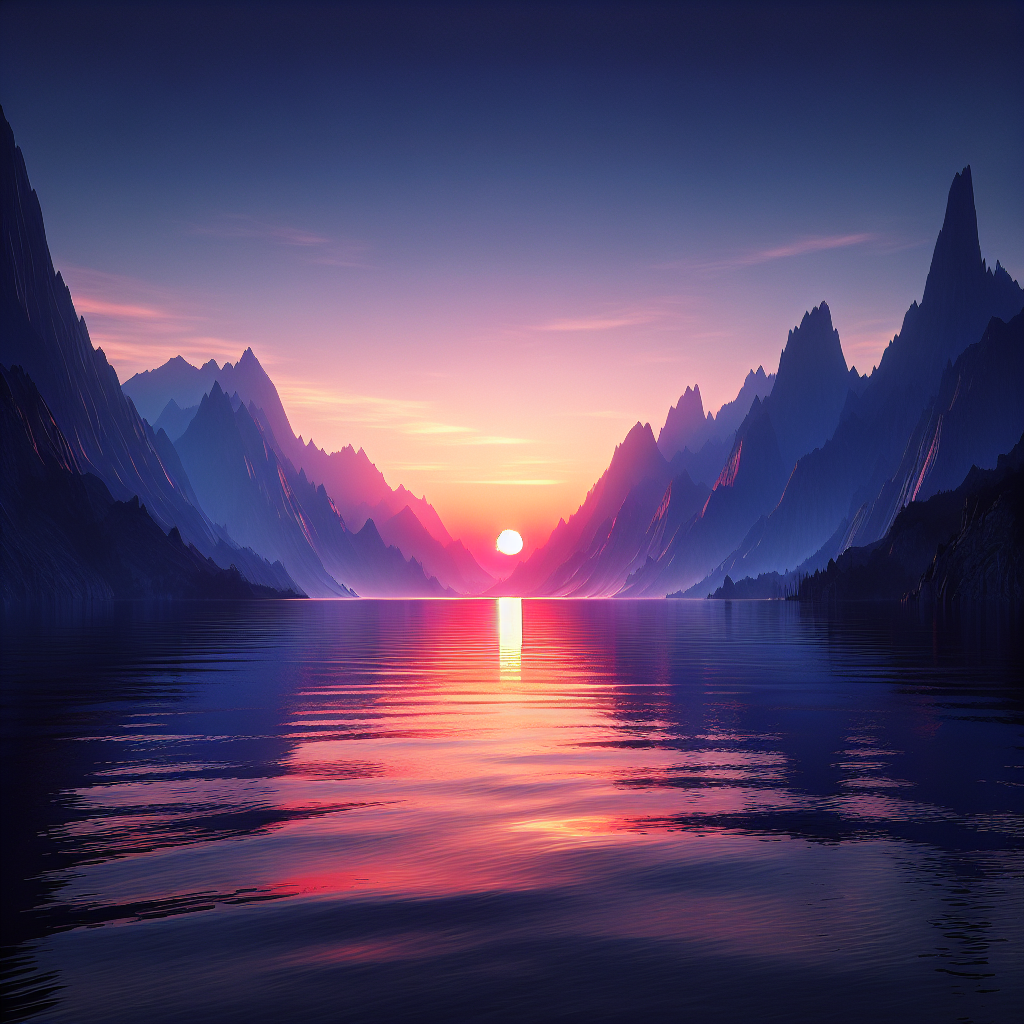

In [10]:
image_url = response.data[0].url
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
try:
    from IPython.display import display
    display(img)
except ImportError:
    img.show() 